In [1]:
%cd ..

/Users/ivallesp/PycharmProjects/somnium


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*3,
              random=10+np.random.randn(10000)
              ))

data = df.values
names = df.columns

In [4]:
df.head()

,weight,height,BMI,fat,random
0,73.828159,181.092275,1.582623,23.657840,9.813252
1,77.254566,178.608340,1.702456,24.225353,10.715748
2,77.963836,192.277715,1.482486,32.501535,9.810022
3,81.764654,171.200459,1.961151,18.805601,10.844959
4,67.931344,183.625163,1.416319,29.403434,10.362034


E_Quantization = 0.36275474504810445
E_Topographic = 0.016700000000000048


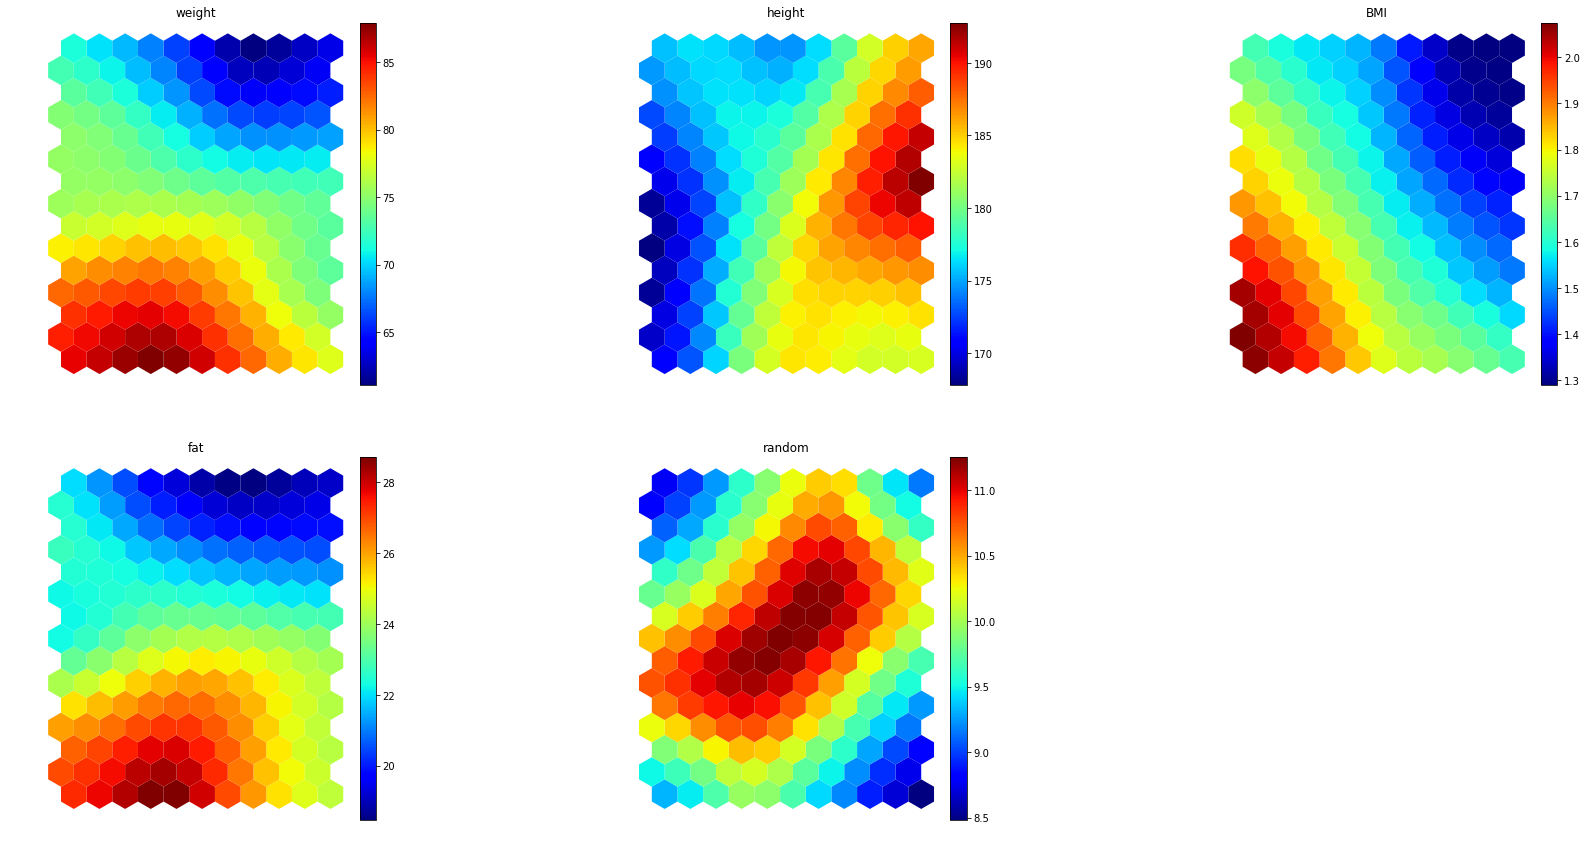

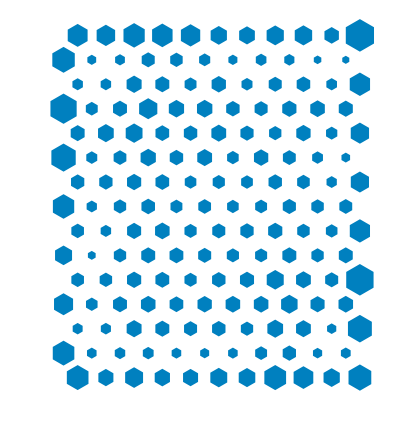

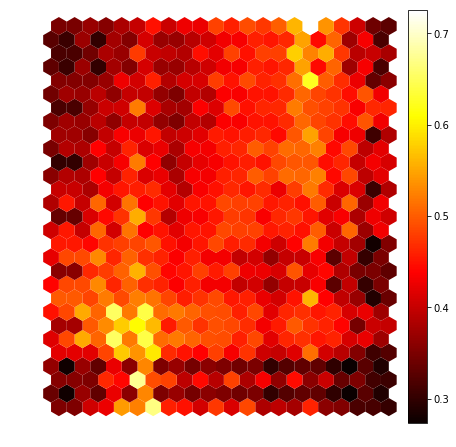

In [5]:
model = SOM(lattice="hexa", normalization="standard", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 11], n_jobs=1)

model.fit(data, 10, 30, 10)
model.fit(data, 30, 10, 3)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

E_Quantization = 0.40876935219446625
E_Topographic = 0.045599999999999974


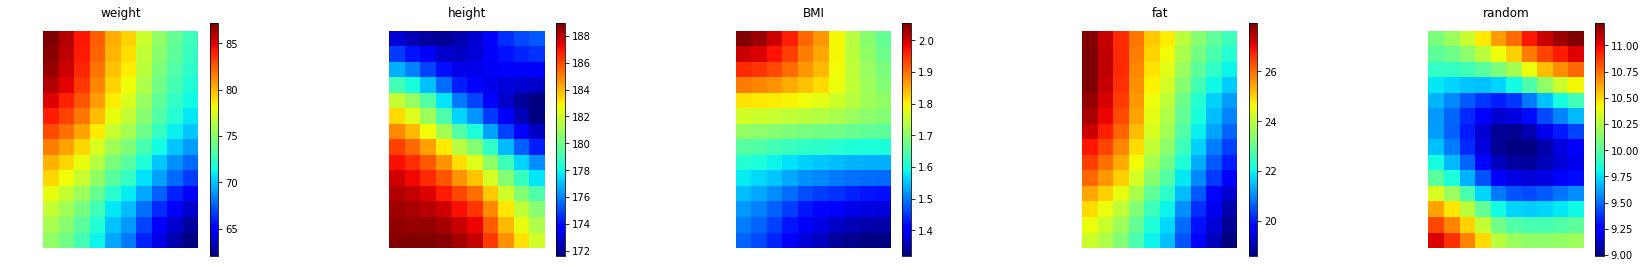

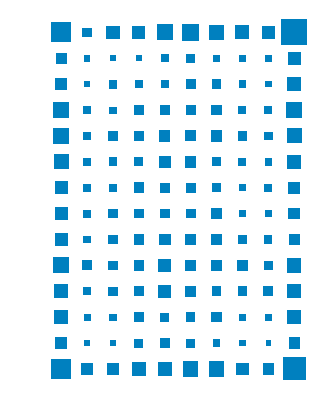

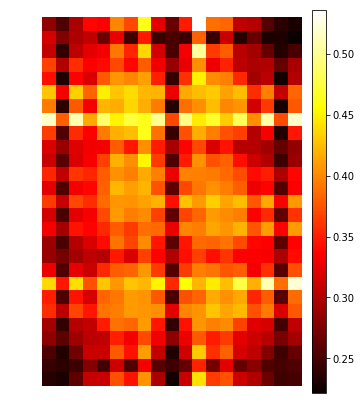

In [6]:
model = SOM(lattice="rect", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[14, 10])

model.fit(data, 10, 30, 10)
model.fit(data, 10, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model=model, names=names, figure_width=30, max_subplot_columns=5)
plot_bmus(model, figure_width=10)
plot_umatrix(model=model, colormap = plt.cm.hot, figure_width=10)